# **Assignment 8**

# Introduction

Link to Dataset: https://data.cityofnewyork.us/Education/2012-SAT-Results/f9bf-2cp4

The dataset I'm using is from NYC OpenData and is provided by the department of education.  
It is about the mean SAT score for each high school for the graduating seniors in the class of 2012.
I chose this dataset because a relative called me asking me questions about the SAT. This is a dreadful test that most people have to take so I thought it'd be interesting to work with this dataset. The format of the SAT have changed from a maximum score of 2400 to 1600 in 2016. The version I took is before 2016 which is also what the class of 2012 took so this has relevance to me.

In [1]:
# Import the pandas, matplotlib, and seaborn libraries and use common aliases for them
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# I need Line2D to deal with colors for legend later
from matplotlib.lines import Line2D

# Data Exploration 

In [2]:
# import the dataset using pandas' read_csv method
sat_df = pd.read_csv("2012_SAT_Results.csv", sep=",")

# Summary statistics is lacking with the describe() function despite the dataset containing numeric values
# Different parts of the SAT shouldn't have a value of s, it should be numeric
sat_df.describe()

,DBN,SCHOOL NAME,Num of SAT Test Takers,SAT Critical Reading Avg. Score,SAT Math Avg. Score,SAT Writing Avg. Score
count,478,478,478,478,478,478
unique,478,478,175,164,173,163
top,01M292,HENRY STREET SCHOOL FOR INTERNATIONAL STUDIES,s,s,s,s
freq,1,1,57,57,57,57


In [3]:
# We can check the datatype for each column, they're all object types
# The Num of SAT Test Takers should be an int
# The average score for the three sections of the SAT should be floats
# We have to do some data wrangling
print(sat_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 478 entries, 0 to 477
Data columns (total 6 columns):
 #   Column                           Non-Null Count  Dtype 
---  ------                           --------------  ----- 
 0   DBN                              478 non-null    object
 1   SCHOOL NAME                      478 non-null    object
 2   Num of SAT Test Takers           478 non-null    object
 3   SAT Critical Reading Avg. Score  478 non-null    object
 4   SAT Math Avg. Score              478 non-null    object
 5   SAT Writing Avg. Score           478 non-null    object
dtypes: object(6)
memory usage: 22.5+ KB
None


# Data Wrangling

In [4]:
# First let's get rid of every row with a value of s for columns that should be numeric
# First we get the indices of the rows with the s
na_indices_num_test_taker = sat_df['Num of SAT Test Takers'] == 's'
na_indices_reading_avg = sat_df['SAT Critical Reading Avg. Score'] == 's'
na_indices_math_avg = sat_df['SAT Math Avg. Score'] == 's'
na_indices_writing_avg = sat_df['SAT Writing Avg. Score'] == 's'

# Take the opposite of what we don't need with the ~ which means not
sat_df = sat_df[~(na_indices_num_test_taker | na_indices_reading_avg | na_indices_math_avg | na_indices_writing_avg)]

# Change the SCHOOL NAME and DBN columns to a string type, the Num of SAT Test Takers to int, & the rest to float
df = sat_df.astype({'DBN': str, 'SCHOOL NAME' : str, 'Num of SAT Test Takers' : int, 'SAT Critical Reading Avg. Score' : float, 
                    'SAT Math Avg. Score' : float, 'SAT Writing Avg. Score' : float})

# I am going to create a new column to get the borough of each school
# The 3rd letter for each row in the DBN column corresponds to the borough in New York City
# I use apply and a lambda function to extact the 3rd letter and assign it to the borough column
df['borough'] = df['DBN'].apply(lambda x: x[2])

# Getting the rows corresponding to each borough
manhattan = df['borough'] == 'M'
bronx = df['borough'] == 'X'
queens = df['borough'] == 'Q'
brooklyn = df['borough'] == 'K'
staten_island = df['borough'] == 'R'

# Change them from 1 letter to the full name of the borough
df.loc[manhattan, 'borough'] = 'Manhattan'
df.loc[bronx, 'borough'] = 'Bronx'
df.loc[queens, 'borough'] = 'Queens'
df.loc[brooklyn, 'borough'] = 'Brooklyn'
df.loc[staten_island, 'borough'] = 'Staten Island'

# I am going to drop the DBN column because I don't think the District Borough Number is needed
# I give the axis paremeter a value of 1 because DBN is a column, the default value for axis is 0 which is for rows
df = df.drop('DBN', axis=1)

# Now the summary statistics display properly
df.describe()

,Num of SAT Test Takers,SAT Critical Reading Avg. Score,SAT Math Avg. Score,SAT Writing Avg. Score
count,421.000000,421.000000,421.000000,421.000000
mean,110.320665,400.850356,413.368171,393.985748
std,155.534254,56.802783,64.684655,58.635109
min,6.000000,279.000000,312.000000,286.000000
25%,41.000000,368.000000,371.000000,360.000000
50%,62.000000,391.000000,395.000000,381.000000
75%,95.000000,416.000000,437.000000,411.000000
max,1277.000000,679.000000,735.000000,682.000000


In [5]:
# I am going to rename every column for ease of use later on
df = df.rename(columns={'SCHOOL NAME': "school", "Num of SAT Test Takers" : "num_test_takers",
                        "SAT Critical Reading Avg. Score" : "avg_reading_score", "SAT Math Avg. Score" : "avg_math_score",
                        "SAT Writing Avg. Score" : "avg_writing_score"})

# We can preview the top few rows of datset using the pandas' head function
print(df.head())

                                          school  num_test_takers  \
0  HENRY STREET SCHOOL FOR INTERNATIONAL STUDIES               29   
1            UNIVERSITY NEIGHBORHOOD HIGH SCHOOL               91   
2                     EAST SIDE COMMUNITY SCHOOL               70   
3                      FORSYTH SATELLITE ACADEMY                7   
4                        MARTA VALLE HIGH SCHOOL               44   

   avg_reading_score  avg_math_score  avg_writing_score    borough  
0              355.0           404.0              363.0  Manhattan  
1              383.0           423.0              366.0  Manhattan  
2              377.0           402.0              370.0  Manhattan  
3              414.0           401.0              359.0  Manhattan  
4              390.0           433.0              384.0  Manhattan  


In [6]:
# We can also view the bottom rows using the .tail() function
print(df.tail())

                                                school  num_test_takers  \
466  BUSHWICK LEADERS HIGH SCHOOL FOR ACADEMIC EXCE...               23   
467                     BUSHWICK COMMUNITY HIGH SCHOOL               24   
471                                          P.S. Q811               32   
476                                GED PLUS s CITYWIDE                8   
477                                    PHOENIX ACADEMY                9   

     avg_reading_score  avg_math_score  avg_writing_score   borough  
466              347.0           358.0              350.0  Brooklyn  
467              359.0           317.0              358.0  Brooklyn  
471              429.0           444.0              433.0    Queens  
476              496.0           400.0              426.0    Queens  
477              367.0           370.0              360.0     Bronx  


# Visualizations

### **Part 1:**
Using matplotlib, create ***two or more plots*** that incorporate at least **5** of the following properties:

Note: these properties vary based on your data.  The goal is to practice creating visualizations and modifying its properties. 

*   Use and change a legend position
*   Change a legend font size
*   Place a legend outside of the plot
*   Create a single legend for all subplots
*   Change the title and x/y labels
*   Change the marker, line colors, and line width
*   Add annotations
*   Modify Axis Text Ticks/Labels
*   Change size of axis Labels
*   Your own choice not included above 

(array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2

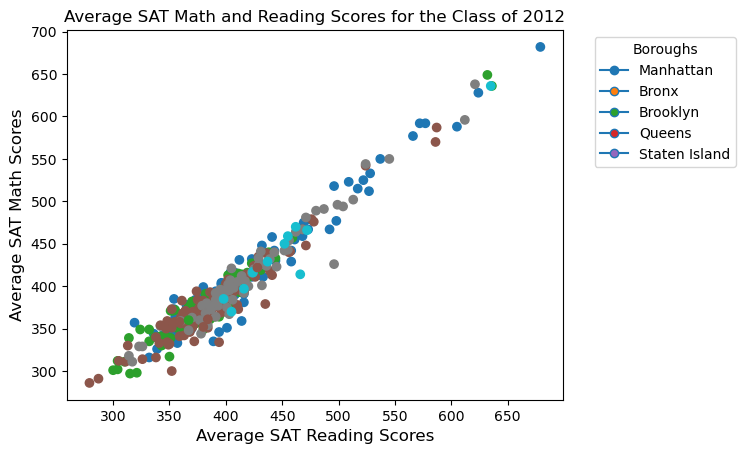

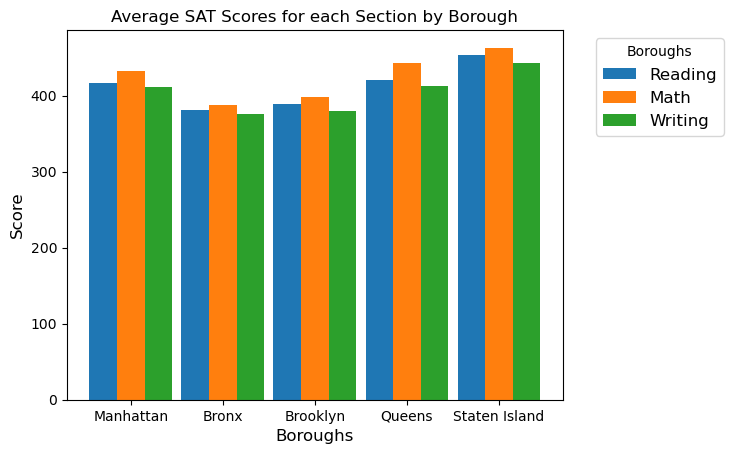

In [7]:
# The first plot is going to be a scatter plot created using pandas' scatter function
# Pandas know automatically how to number the figures for each plot
plt.figure()
# The average reading score of the dataframe is on the x-axis and the average math score is on the y-axis
# 1. There are five boroughs so each point will represent one of the 5 boroughs instead of just being the same color
# The c parameter which stands for color is given a factorized borough column to encode it to unique labels, we take the first element which is the label
# The cmap parameter stands for color map and it's given the tab10 color map
# This plot is meant to show the correlation between the average reading scores and average writing scores for the SAT
plt.scatter(df.avg_reading_score, df.avg_writing_score, c=pd.factorize(df['borough'])[0], cmap='tab10')

# 2. The .xlabel() function changes the x label, .ylabel() changes the y label, .title() changes the title
# 3. The size of axis labels can be changed with the fontsize parameter for .xlabel() and .ylabel(), in this case they're both changed to 12
plt.xlabel("Average SAT Reading Scores", fontsize = 12)
plt.ylabel("Average SAT Math Scores", fontsize = 12)
plt.title("Average SAT Math and Reading Scores for the Class of 2012")

check_order_of_appearance = pd.factorize(df['borough'])
print(check_order_of_appearance)
# The borough names in order of appearance from the dataset based on the above
borough_names = ['Manhattan', 'Bronx', 'Brooklyn', 'Queens', 'Staten Island']

# Line2D is needed for providing corresponding colors to a scatterplot in a legend
# Line2D requires the x and y axis for parameters, it's given an abritrary value of 0 for both
# The marker is repesented by o
# The markerfacecolor parameter is passed the tab10 color map for each borough
legend_elements = [Line2D([0], [0], marker='o', markerfacecolor=plt.get_cmap('tab10')(i), label=label) for i, label in enumerate(borough_names)]

# 4. The legend is being used and changed to a different position
# 5. The position the legend is being changed to is outside the scatterplot
# The bbox_to_anchor paramter is given a tuple of values 1.05 and 1
# The value of 1.05 stands for 105%, this tells it to be 5% of the scatterplot's width to the right
# The value of 1 for the height ensures it stays within 100% of the scatterplot's height
# The loc parameter is set to upper left so the legend aligns with the upper left side
# The handles parameter is given the legend_elements so it knows specifically what to display
plt.legend(handles=legend_elements, title='Boroughs', bbox_to_anchor=(1.05, 1), loc='upper left')

# The second plot will be a bar plot that shows the averages of each section of the SAT for each borough
plt.figure()

# Create a function to get the averages for each section of the SAT and return it as a list
def get_averages(dataframe, borough_indices):
    return (dataframe.loc[borough_indices, 'avg_reading_score'].mean(), 
            dataframe.loc[borough_indices, 'avg_math_score'].mean(),
            dataframe.loc[borough_indices, 'avg_writing_score'].mean())

#reuse the indices for each borough from earlier to get the average for each section of the SAT by borough
borough_indices = [manhattan, bronx, brooklyn, queens, staten_island]
# sat_avg_list will store the rows of averages for each borough
sat_avg_list = []
for name, indices in zip(borough_names, borough_indices):
    reading, math, writing = get_averages(df, indices)
    sat_avg_list.append([name, reading, math, writing])

# Create new dataframe off of the nested list
df_boroughs_avg = pd.DataFrame(sat_avg_list, columns=['borough', 'avg_reading_score', 'avg_math_score', 'avg_writing_score'])

# Getting the starting positions to make space for each section of the SAT by list comprehension for the x-axis
r1 = [i for i in range(5)]
r2 = [x + 0.3 for x in r1]
r3 = [x + 0.6 for x in r1]

plt.bar(r1, df_boroughs_avg['avg_reading_score'], width=0.3, label='Reading')
plt.bar(r2, df_boroughs_avg['avg_math_score'], width=0.3, label='Math')
plt.bar(r3, df_boroughs_avg['avg_writing_score'], width=0.3, label='Writing')

# 1. The X, Y, & title are labeled
# 2. The size of the axis labels are changed
plt.xlabel("Boroughs", fontsize=12)
plt.ylabel("Score", fontsize=12)
plt.title("Average SAT Scores for each Section by Borough")

# 3. The axis text ticks are modified
plt.xticks([x + 0.3 for x in r1], df_boroughs_avg['borough'])

# 4. The legend's font size change is changed to 12
# 5. The legend position is outside of the plot with the same parameters and values as the first matplotlib plot
plt.legend(title="Boroughs", fontsize=12, bbox_to_anchor=(1.05, 1), loc='upper left')

# Displays both plots
plt.show()

### **Part 2:**

Recreate the visualizations above using the Seaborn library as best as possible.  

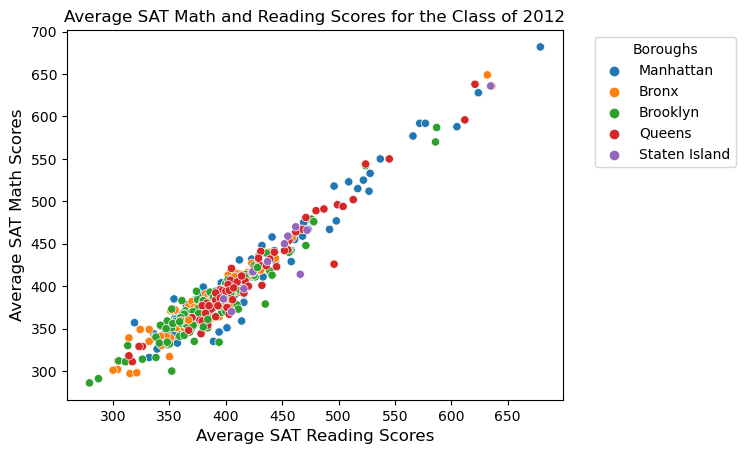

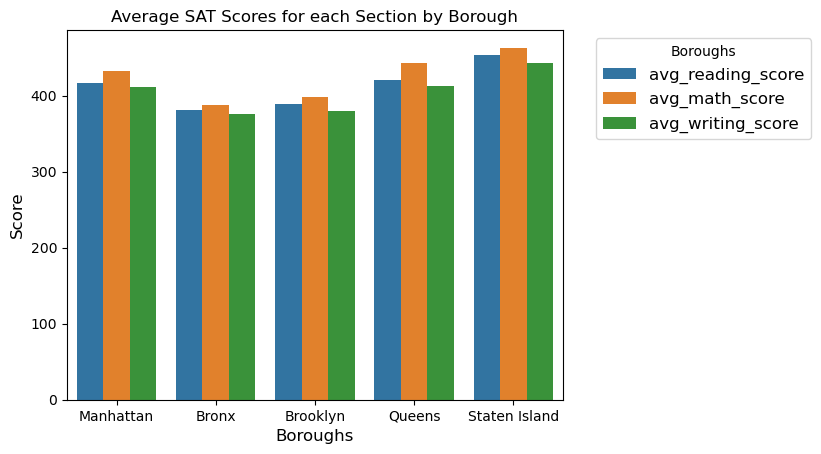

In [8]:
# This scatterplot in seaborn is a recreation of the first one in matplotlib
# This shows the correlation between average reading and writing SAT scores for each school
plt.figure()

# You can create a scatterplot in seaborn using the scatterplot function
# You can change the colors of each marker on the scatterplot through hue, in this case I gave it values of the borough column
# Assigning the hue a value automatically creates a legend
sns.scatterplot(data=df, x='avg_reading_score', y='avg_writing_score', hue='borough')

# Moves the legend outside of the plot with same parameters and values as the matplotlib version
plt.legend(title="Boroughs", bbox_to_anchor=(1.05, 1), loc='upper left')

# The labels are also given the same parameters and values as the matplotlib version
plt.xlabel("Average SAT Reading Scores", fontsize = 12)
plt.ylabel("Average SAT Math Scores", fontsize = 12)
plt.title("Average SAT Math and Reading Scores for the Class of 2012")

# This barplot in seaborn is a recreation of the second plot created in matplotlib
# This shows the average scores of each section of the SAT by borough
plt.figure()

# Use pandas' melt function to convert to long format
# The id_vars parameter is given borough because we don't want the values there to collapse into a single column
# Every column except borough is collapsed into a new column called Subject which is given to the var_name parameter
# The values from each column except id_vars is also collapsed into a new column called Score which is given to the value_name parameter
reshaped_df = df_boroughs_avg.melt(id_vars='borough', var_name='Subject', value_name='Score')

sns.barplot(data=reshaped_df, x='borough', y='Score', hue='Subject')

# The labels are also given the same parameters and values as the matplotlib version
plt.xlabel("Boroughs", fontsize=12)
plt.ylabel("Score", fontsize=12)
plt.title("Average SAT Scores for each Section by Borough")

# Moves the legend outside of the plot with same parameters and values as the matplotlib version
plt.legend(title="Boroughs", fontsize=12, bbox_to_anchor=(1.05, 1), loc='upper left')

plt.show()

### **Part 3:**

Based on the above plots, the difference in creating a plot in matplotlib and seaborn is that it takes fewer lines to do the same thing in seaborn. Seaborn automatically makes a legend when you give the hue parameter of a plot a column from your dataframe. You have to do it manually for matplotlib for some cases to get the legend to display what you want, by default it can be blank depending on the plot. Seaborn can't do everything by itself though, but it is built on top of matplotlib. To even get seaborn plots to display, you have to use matplotlib's .show() method.

# Conclusions  

What I noticed from this dataset is that being good at the reading section of the SAT strongly correlates with doing well on the writing section, that is no surprise. For New York City's class of 2012, the graduating seniors have the highest average for every section in Staten Island. The average SAT score for each section for each borough is less than 600 to my surprise. I thought it would be higher because the maximum score is 800, but the average for each borough hovers around 400 instead. The average performance of high school students in each borough is very similar, there seems to be no real difference.